<a href="https://colab.research.google.com/github/cauancalmeida/Data_Science_studies/blob/main/Imers%C3%A3o_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.8 MB/s eta 0:00:00


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry

#Analise de dados

Palavra da aula: Pandas

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv") #importação dos dados

##Visualisação Inicial dos dados

In [3]:
df.head() #exibe as 5 primeiras linhas

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info() #exibe informações gerais do df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe() #descreve como estão destribuidos os dados numericos

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape #df.shape[0],df.shape[1]
print(f"O DataFrame possui {linhas} linhas e {colunas} colunas.")

O DataFrame possui 133349 linhas e 11 colunas.


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
# Mapeamento dos nomes das colunas para português
mapeamento_colunas = {
    'work_year': 'ano',
    'experience_level': 'nivel_experiencia',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'salario_dolar',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'localizacao_empresa',
    'company_size': 'tamanho_empresa'
}

# Renomear as colunas do DataFrame
df.rename(columns=mapeamento_colunas, inplace=True)

# Exibir os novos nomes das colunas para verificar
print(df.columns)

Index(['ano', 'nivel_experiencia', 'contrato', 'cargo', 'salario', 'moeda',
       'salario_dolar', 'residencia', 'remoto', 'localizacao_empresa',
       'tamanho_empresa'],
      dtype='object')


##Analizando colunas categoricas

In [10]:
df['nivel_experiencia'].value_counts() #frequencia de cada nivel de experiencia

,count
nivel_experiencia,
SE,77241
MI,40465
EN,12443
EX,3200


Sigla	Significado	Descrição:

SE | Senior	Profissional experiente (nível sênior)

MI | Mid	Nível intermediário

EN | Entry	Iniciante ou júnior (entry-level)

EX | Executive	Executivo, liderança sênior (C-Level)

In [11]:
df['contrato'].value_counts() #frequencia de cada tipo de contrato

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


Sigla	Significado	Descrição

FT - Full-time	Tempo integral – trabalho padrão de 40h/semana ou período completo

PT - Part-time	Meio período – carga horária reduzida

CT - Contract	Contrato temporário ou por projeto – geralmente por prazo determinado

FL - Freelance	Freelancer – trabalho autônomo ou por demanda, sem vínculo formal

In [12]:
df['remoto'].value_counts() #frequencia de cada tipo de modelo de trabalho

,count
remoto,
0,105312
100,27718
50,319


Sigla - Significado

0 - Presencial

100	- Remoto

50	- Híbrido

In [13]:
df['tamanho_empresa'].value_counts() #frequencia do tamanho da empresa

,count
tamanho_empresa,
M,129561
L,3574
S,214


Sigla - Significado - Descrição

M	- Medium	- Empresa de tamanho médio

L	- Large	- Empresa de tamanho grande

S	- Small	- Empresa de tamanho pequeno


In [14]:
# Mapeamento para 'nivel_experiencia'
mapeamento_nivel_experiencia = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}
df['nivel_experiencia'] = df['nivel_experiencia'].replace(mapeamento_nivel_experiencia)
print("Frequência de cada nível de experiência:")
display(df['nivel_experiencia'].value_counts())

Frequência de cada nível de experiência:


,count
nivel_experiencia,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [15]:
# Mapeamento para 'contrato'
mapeamento_contrato = {
    'FT': 'Integral',
    'PT': 'Parcial',
    'CT': 'Contrato',
    'FL': 'Freelance'
}
df['contrato'] = df['contrato'].replace(mapeamento_contrato)
print("Frequência de cada tipo de contrato:")
display(df['contrato'].value_counts())

Frequência de cada tipo de contrato:


,count
contrato,
Integral,132563
Contrato,394
Parcial,376
Freelance,16


In [16]:
# Mapeamento para 'remoto'
mapeamento_remoto = {
    0: 'Presencial',
    100: 'Remoto',
    50: 'Híbrido'
}
df['remoto'] = df['remoto'].replace(mapeamento_remoto)
print("Frequência de cada tipo de modelo de trabalho:")
display(df['remoto'].value_counts())

Frequência de cada tipo de modelo de trabalho:


,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [17]:
# Mapeamento para 'tamanho_empresa'
mapeamento_tamanho_empresa = {
    'M': 'Media',
    'L': 'Grande',
    'S': 'Pequena'
}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(mapeamento_tamanho_empresa)
print("Frequência do tamanho da empresa:")
display(df['tamanho_empresa'].value_counts())

Frequência do tamanho da empresa:


,count
tamanho_empresa,
Media,129561
Grande,3574
Pequena,214


In [18]:
df.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,salario_dolar,residencia,remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [19]:
df.describe(include='object') #inclui os dados descritivos

,nivel_experiencia,contrato,cargo,moeda,residencia,remoto,localizacao_empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


##Desafio
1-Utilize o método value_counts() para descobrir a frequência de cada nível de experiência na base de dados.

2- Crie um gráfico de barras que mostre a distribuição dos salários médios por nível de experiência. Para isso, você pode usar a biblioteca Matplotlib ou Seaborn.

3-Por fim, faça uma breve análise sobre o que os resultados mostram em relação aos salários por nível de experiência.

In [20]:
#1
df.nivel_experiencia.value_counts()

,count
nivel_experiencia,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


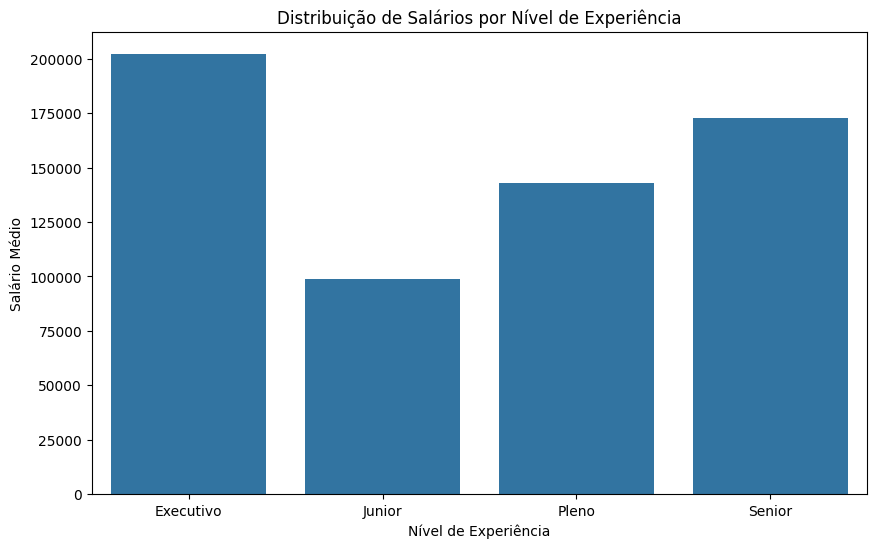

In [21]:
#2
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a média dos salários por nível de experiência
salario_medio = df.groupby('nivel_experiencia')['salario_dolar'].mean().reset_index()

#criar grafico
plt.figure(figsize=(10, 6))
sns.barplot(x='nivel_experiencia', y='salario_dolar', data=salario_medio)
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário Médio')
plt.title('Distribuição de Salários por Nível de Experiência')
plt.show()

3- Este grafico nos mostra que quanto maior o nivel de experiencia, maior o salario.
Devivo a pouca experiencia, profissionais de nivel Junior, possuem os salarios mais baixos.
Ja quando olhamos para nivel Pleno, vemos um aumento significativo em relação aos Juniors.
Como os profissionais seniors, ja tem uma vasta experiencia, tendem a ter os salarios mais altos quando falamos de cargos tecnicos.
Ja como de praxe no mercado, os Executivos, mesmo sendo um menor numero absoluto, tem os maiores salarios medios.

#Limpeza de dados

Palavra chave: PRINT

In [22]:
df.isnull()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,salario_dolar,residencia,remoto,localizacao_empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [23]:
df.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,salario_dolar,residencia,remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [24]:
df.isnull().sum() #soma dos campos nulos

,0
ano,10
nivel_experiencia,0
contrato,0
cargo,0
salario,0
moeda,0
salario_dolar,0
residencia,0
remoto,0
localizacao_empresa,0


In [25]:
df['ano'].unique()#veirificando os valores unicos da coluna ano

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [26]:
df[df.isnull().any(axis=1)]#trazebdi as linhas que o ano esta nulo

,ano,nivel_experiencia,contrato,cargo,salario,moeda,salario_dolar,residencia,remoto,localizacao_empresa,tamanho_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [27]:
df_limpo = df.dropna(subset=['ano']) #exclui as linhas que possuem ano nulo

In [28]:
df_limpo.isnull().sum()

,0
ano,0
nivel_experiencia,0
contrato,0
cargo,0
salario,0
moeda,0
salario_dolar,0
residencia,0
remoto,0
localizacao_empresa,0


In [29]:
df_limpo.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,salario_dolar,residencia,remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [30]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano                  133339 non-null  float64
 1   nivel_experiencia    133339 non-null  object 
 2   contrato             133339 non-null  object 
 3   cargo                133339 non-null  object 
 4   salario              133339 non-null  int64  
 5   moeda                133339 non-null  object 
 6   salario_dolar        133339 non-null  int64  
 7   residencia           133339 non-null  object 
 8   remoto               133339 non-null  object 
 9   localizacao_empresa  133339 non-null  object 
 10  tamanho_empresa      133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [31]:
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('int64')) #converte a coluna ano para int

##Exemplo pra completar base

In [32]:
#Cria Datafame de teste
df_salarios = pd.DataFrame(
    {
        'Nome': ['Alice', 'Pedro', 'Charlie', 'David','Felpe','Roberto'],
        'Salario': [50000, 60000, np.nan, 55000, np.nan,1000000]
    }
)
#substitui os nulos pela media
df_salarios['Salario_Media']= df_salarios['Salario'].fillna(df_salarios['Salario'].mean().round(2))

#substitui os nulos pela mediana
df_salarios['Salario_Mediana']= df_salarios['Salario'].fillna(df_salarios['Salario'].median())

df_salarios

,Nome,Salario,Salario_Media,Salario_Mediana
0,Alice,50000.0,50000.0,50000.0
1,Pedro,60000.0,60000.0,60000.0
2,Charlie,NaN,291250.0,57500.0
3,David,55000.0,55000.0,55000.0
4,Felpe,NaN,291250.0,57500.0
5,Roberto,1000000.0,1000000.0,1000000.0


In [33]:
#cria df de teste
df_temperatura = pd.DataFrame({
    'Dia': ['Segunda','Terça','Quarta','Quinta','Sexta'],
    "Temp": [30,np.nan,25,30,np.nan]
})
#preenchendo os valores nulos com os valores do dia anterior
df_temperatura['Preechido_ffill'] = df_temperatura['Temp'].ffill()
df_temperatura


,Dia,Temp,Preechido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,25.0,25.0
3,Quinta,30.0,30.0
4,Sexta,NaN,30.0


In [34]:
#cria df de teste
df_temperatura = pd.DataFrame({
    'Dia': ['Segunda','Terça','Quarta','Quinta','Sexta'],
    "Temp": [30,np.nan,25,30,np.nan]
})
#preenchendo os valores nulos com os valores do dia posterior
df_temperatura['Preechido_bfill'] = df_temperatura['Temp'].bfill()
df_temperatura


,Dia,Temp,Preechido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,25.0
2,Quarta,25.0,25.0
3,Quinta,30.0,30.0
4,Sexta,NaN,NaN


In [35]:
#cria df de teste
df_cidades = pd.DataFrame({
    'Nome': ['Alice', 'Pedro', 'Charlie', 'David','Felpe','Roberto'],
    "Cidade": ['São Paulo',np.nan,'Curitiba','Belo Horizonte',np.nan,'Manaus']
})
df_cidades['Cidade_preenchida'] = df_cidades['Cidade'].fillna('Desconhecida')
df_cidades

,Nome,Cidade,Cidade_preenchida
0,Alice,São Paulo,São Paulo
1,Pedro,NaN,Desconhecida
2,Charlie,Curitiba,Curitiba
3,David,Belo Horizonte,Belo Horizonte
4,Felpe,NaN,Desconhecida
5,Roberto,Manaus,Manaus


proposta:

1. Crie um DataFrame chamado df_estudantes com as seguintes colunas: "nome", "idade" e "nota".

2. Insira pelo menos 5 estudantes, mas deixe a nota de alguns deles como nula (use np.nan para representar os valores nulos).

3. Aplique as técnicas que aprendemos na aula para tratar os dados faltantes na coluna "nota":
Preencha os valores nulos com a média das notas.
Depois, crie uma nova coluna chamada "nota_mediana" e preencha os valores nulos com a mediana das notas.

4. Por fim, exiba o DataFrame original e o DataFrame após o tratamento dos dados.

In [36]:
df_estudantes = pd.DataFrame(
    {
        'Nome': ['Alice', 'Pedro', 'Charlie', 'David','Felpe'],
        'Idade': [18, 19, 22, 24, 17],
        'Nota': [5,np.nan,8,np.nan,1]
    })
df_estudantes

,Nome,Idade,Nota
0,Alice,18,5.0
1,Pedro,19,NaN
2,Charlie,22,8.0
3,David,24,NaN
4,Felpe,17,1.0


In [37]:
df_estudantes['Nota_Media']= df_estudantes['Nota'].fillna(df_estudantes['Nota'].mean().round(2))
df_estudantes['Nota_Mediana']= df_estudantes['Nota'].fillna(df_estudantes['Nota'].median())
df_estudantes

,Nome,Idade,Nota,Nota_Media,Nota_Mediana
0,Alice,18,5.0,5.00,5.0
1,Pedro,19,NaN,4.67,5.0
2,Charlie,22,8.0,8.00,8.0
3,David,24,NaN,4.67,5.0
4,Felpe,17,1.0,1.00,1.0


#Visualização de dados

Palavra chave: MATPLOTLIB

In [38]:
df_limpo.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,salario_dolar,residencia,remoto,localizacao_empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


<Axes: title={'center': 'Distribuição de Cargos por Nível de Experiência'}, xlabel='nivel_experiencia'>

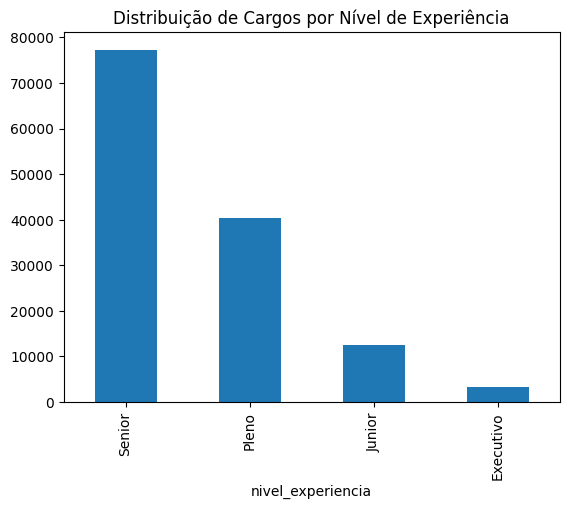

In [39]:
#plotando um grafico com as quantidades de de cada nivel de experiencia
df_limpo['nivel_experiencia'].value_counts().plot(kind='bar', title='Distribuição de Cargos por Nível de Experiência')

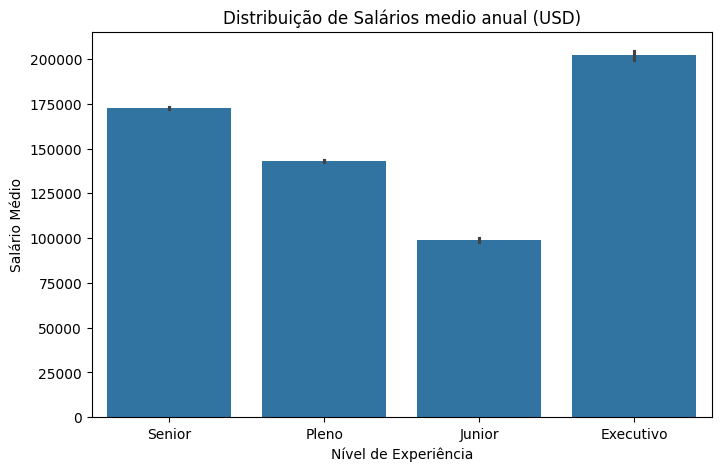

In [40]:
plt.figure(figsize=(8, 5)) #cria a figura
sns.barplot(x='nivel_experiencia', y='salario_dolar', data=df_limpo) #cria o grafico
plt.xlabel('Nível de Experiência') #nome do eixo x
plt.ylabel('Salário Médio') #nome do eixo Y
plt.title('Distribuição de Salários medio anual (USD)') #titulo do grafico
plt.show() #mostrar figura

In [41]:
#agrupando por nivel de experiencia o salario medio ordenado do maior para o menor
df_limpo.groupby('nivel_experiencia')['salario_dolar'].mean().sort_values(ascending=False)

,salario_dolar
nivel_experiencia,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [42]:
salario_ordenado = df_limpo.groupby('nivel_experiencia')['salario_dolar'].mean().sort_values(ascending=False).index
salario_ordenado

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='nivel_experiencia')

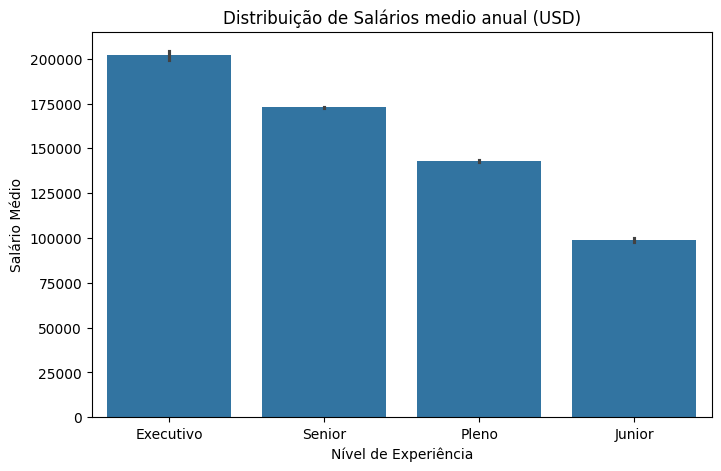

In [43]:
plt.figure(figsize=(8, 5)) #cria a figura
sns.barplot(x='nivel_experiencia', y='salario_dolar', data=df_limpo, order=salario_ordenado) #cria o grafico
plt.xlabel('Nível de Experiência') #nome do eixo x
plt.ylabel('Salário Médio') #nome do eixo Y
plt.title('Distribuição de Salários medio anual (USD)') #titulo do grafico
plt.show() #mostrar figura

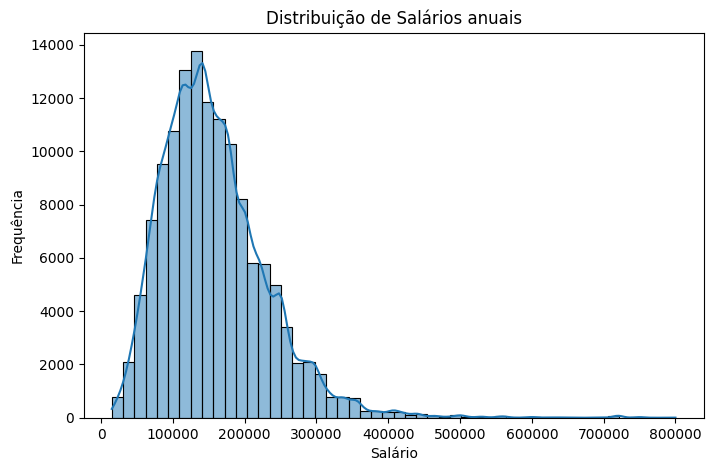

In [44]:
plt.figure(figsize=(8, 5)) #cria a figura
sns.histplot(df_limpo['salario_dolar'], bins= 50, kde=True)
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.title('Distribuição de Salários anuais')
plt.show()

Neste caso, a maioria dos salarios estão concentrados nos valores mais baixos.

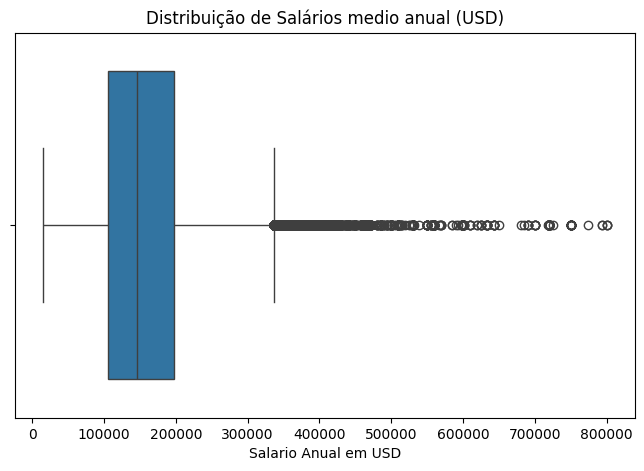

In [45]:
plt.figure(figsize=(8, 5)) #cria a figura
sns.boxplot(x='salario_dolar', data=df_limpo) #cria o grafico
plt.xlabel('Salario Anual em USD') #nome do eixo x
plt.title('Distribuição de Salários medio anual (USD)') #titulo do grafico
plt.show() #mostrar figura

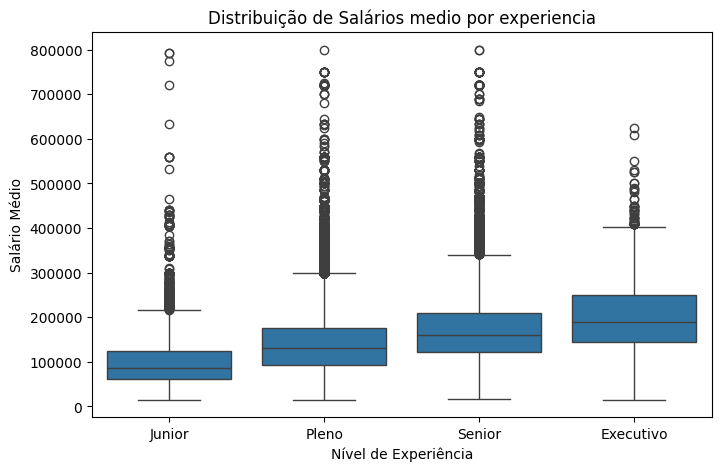

In [46]:
ordem_lvl_exp = ['Junior','Pleno','Senior','Executivo']
plt.figure(figsize=(8, 5)) #cria a figura
sns.boxplot(x='nivel_experiencia',y='salario_dolar', data=df_limpo, order=ordem_lvl_exp) #cria boxsplot
plt.xlabel('Nível de Experiência') #nome do eixo x
plt.ylabel('Salário Médio') #nome do eixo Y
plt.title('Distribuição de Salários medio por experiencia') #titulo do grafico
plt.show() #mostrar figura

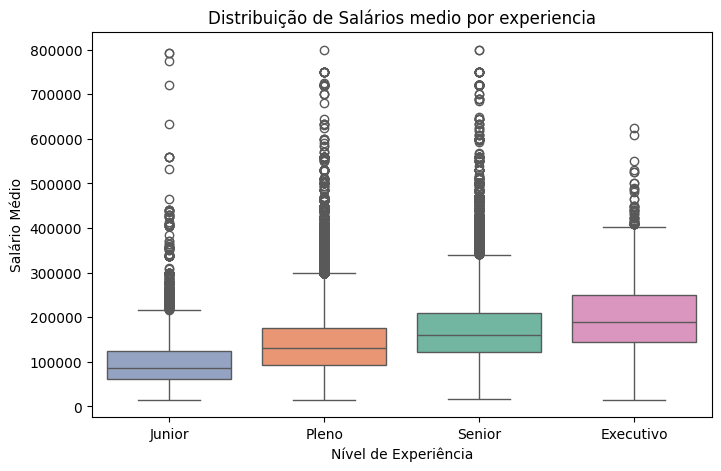

In [47]:
ordem_lvl_exp = ['Junior','Pleno','Senior','Executivo']
plt.figure(figsize=(8, 5)) #cria a figura
sns.boxplot(x='nivel_experiencia',y='salario_dolar', data=df_limpo, order=ordem_lvl_exp, palette='Set2', hue='nivel_experiencia') #cria boxsplot
plt.xlabel('Nível de Experiência') #nome do eixo x
plt.ylabel('Salário Médio') #nome do eixo Y
plt.title('Distribuição de Salários medio por experiencia') #titulo do grafico
plt.show() #mostrar figura

In [48]:
# Calcular a média dos salários por nível de experiência
salario_medio_plotly = df_limpo.groupby('nivel_experiencia')['salario_dolar'].mean().sort_values(ascending=False).reset_index()

# Criar o gráfico de barras interativo com Plotly Express
fig = px.bar(salario_medio_plotly,
             x='nivel_experiencia',
             y='salario_dolar',
             title='Distribuição de Salários médio anual (USD) por Nível de Experiência',
             labels={'nivel_experiencia': 'Nível de Experiência', 'salario_dolar': 'Salário Médio'},
             color='nivel_experiencia', # Adiciona cor por nível de experiência
             template='plotly_white' # Define o template do gráfico
            )

# Exibir o gráfico
fig.show()

In [49]:
# Contar o numero de registros por tipo de trabalho
conta_remoto = df_limpo['remoto'].value_counts().reset_index()
#definir o nome das colulas
conta_remoto.columns = ['tipo_trabalho', 'quantidade']
# Criar o gráfico de pizza interativo com Plotly Express
fig = px.pie(conta_remoto,
             values='quantidade',
             names='tipo_trabalho',
             title='Proporção de Tipos de Trabalho Remoto',
             hole=0.5 #define o tamanho do burado (rosca)
            )
fig.update_traces(textinfo='percent+label') #define o texto do gráfico
# Exibir o gráfico
fig.show()

In [50]:
df_limpo['cargo'].unique()

array(['Solutions Engineer', 'Data Engineer', 'Data Scientist',
       'BI Developer', 'Data Analyst', 'Applied Scientist',
       'Systems Engineer', 'Director', 'Associate', 'Software Engineer',
       'Consultant', 'Analyst', 'Product Manager', 'Software Developer',
       'Engineer', 'Developer', 'Data Specialist', 'Manager',
       'Research Scientist', 'Software Architect',
       'Data Management Analyst', 'Data Reporter',
       'Computational Biologist', 'Product Designer',
       'Software Development Engineer', 'Architect',
       'Data Analytics Manager', 'Principal Statistical Programmer',
       'Cloud Engineer', 'Data Architect', 'Product Owner', 'Executive',
       'Business Intelligence Engineer', 'Data Governance Lead',
       'Data Governance Specialist', 'AI Engineer', 'Solutions Architect',
       'AI Researcher', 'Machine Learning Engineer', 'Bear Robotics',
       'Data Strategist', 'Research Engineer', 'Researcher',
       'Business Analyst', 'Solution Engineer'

In [58]:
#função para alterar o formato da coluna residencia
def iso2_to_iso3(icodigo):
  try:
    return pycountry.countries.get(alpha_2=icodigo).alpha_3
  except:
    return None
#Cria coluna com residencia iso3 (3 caracteres)
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

#Calcular o salario médio de cientistas de dados por pais
salario_cientista_dados= df_limpo.query('cargo == "Data Scientist"').groupby('residencia_iso3')['salario_dolar'].mean().sort_values(ascending=False).reset_index()
#Gerar grafico de mapa
fig = px.choropleth(salario_cientista_dados,
            locations = 'residencia_iso3',
            color = 'salario_dolar',
            color_continuous_scale='rdylgn',
            title='Distribuição de Salários médio anual (USD) por país dos cientistas de dados',
            labels={'residencia_iso3': 'País', 'salario_dolar': 'Salário Médio'}
            )

# Exibir o gráfico
fig.show()

1. Utilize o método groupby para agrupar os dados pela coluna de senioridade.

2. Calcule a mediana dos salários (USD) para cada nível de senioridade.

3. Plote um gráfico de barras usando a biblioteca Seaborn ou Matplotlib, mostrando a mediana dos salários por senioridade.

4. Adicione títulos e rótulos aos eixos para tornar o gráfico mais informativo.

/tmp/ipython-input-530726089.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




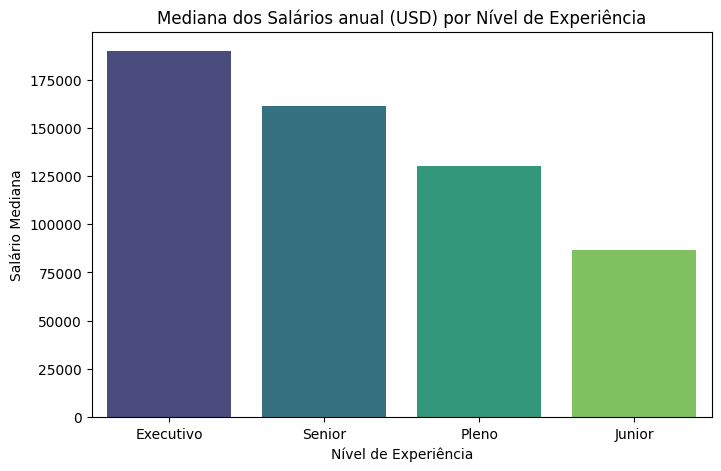

In [53]:
mediana_salario= df_limpo.groupby('nivel_experiencia')['salario_dolar'].median().sort_values(ascending=False)
plt.figure(figsize=(8, 5)) #cria a figura
sns.barplot(x=mediana_salario.index, y=mediana_salario, palette='viridis') #cria o grafico
plt.xlabel('Nível de Experiência') #nome do eixo x
plt.ylabel('Salário Mediana') #nome do eixo Y
plt.title('Mediana dos Salários anual (USD) por Nível de Experiência') #titulo do grafico
plt.show() #mostrar figura

##Salvando Data Frame

In [59]:
df_limpo.to_csv('dados_limpo.csv', index=False)

In [60]:
df_limpo.head()

,ano,nivel_experiencia,contrato,cargo,salario,moeda,salario_dolar,residencia,remoto,localizacao_empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media,USA
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media,USA
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media,AUS
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media,AUS
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media,USA


#Construindo um Dashboard com Streamlit

1. Criando ambiente (VS Code):
  * python -m venv .venv

 2. Ativando o ambiente(Windows):
  * .venv\Scripts\Activate

 3. Criar um arquivo chamado requirements.txt e adicionar os pacotes necessários:
  * pandas==2.2.3
  * streamlit==1.44.1
  * plotly==5.24.1

4. Instalar as bibliotecas necessárias
 * pip install -r requirements.txt

5. Criar a Interface do Dashboard com Streamlit

6. Realizar o deploy do Dashboard no Streamlit Cloud: https://streamlit.io/cloud

palavra chave: ALURA